# Exploratory Data Analysis (EDA) Notebook

This notebook explores traffic crash data in Chicago. The main goals are:
- Cleaning and preparing the data.
- Performing exploratory data analysis (EDA).
- Visualizing patterns such as crash distribution by time and injuries.
- Generating a geographic heatmap of crash locations.

In [9]:
import pandas as pd
import matplotlib.pyplot as plt
import folium
from folium.plugins import HeatMap

In [11]:
df = pd.read_csv("https://raw.githubusercontent.com/AlanK3/is204-final-group-project/refs/heads/main/data/2024ChicagoTrafficCrashes.csv")
df.head()

,CRASH_RECORD_ID,CRASH_DATE_EST_I,CRASH_DATE,POSTED_SPEED_LIMIT,TRAFFIC_CONTROL_DEVICE,DEVICE_CONDITION,WEATHER_CONDITION,LIGHTING_CONDITION,FIRST_CRASH_TYPE,TRAFFICWAY_TYPE,...,INJURIES_NON_INCAPACITATING,INJURIES_REPORTED_NOT_EVIDENT,INJURIES_NO_INDICATION,INJURIES_UNKNOWN,CRASH_HOUR,CRASH_DAY_OF_WEEK,CRASH_MONTH,LATITUDE,LONGITUDE,LOCATION
0,1ba71bdbb2e32c87c6da5f67f57e438da46506d0ac1478...,NaN,11/19/2024 01:32:00 AM,40,TRAFFIC SIGNAL,FUNCTIONING PROPERLY,RAIN,"DARKNESS, LIGHTED ROAD",ANGLE,FOUR WAY,...,0.0,2.0,1.0,0.0,1,3,11,41.758878,-87.585682,POINT (-87.585682440932 41.758877741252)
1,ba0a5de0700aafcbe9a70baa842602009e5f3e277f1c09...,NaN,11/19/2024 12:56:00 AM,30,TRAFFIC SIGNAL,FUNCTIONING PROPERLY,RAIN,DARKNESS,REAR TO SIDE,RAMP,...,0.0,0.0,3.0,0.0,0,3,11,41.834117,-87.675232,POINT (-87.675231579807 41.83411690885)
2,5e395590aa62bccdca20695731c4e61a239d2a8d5bc4a1...,NaN,11/19/2024 12:30:00 AM,30,STOP SIGN/FLASHER,FUNCTIONING PROPERLY,RAIN,"DARKNESS, LIGHTED ROAD",REAR END,FOUR WAY,...,0.0,2.0,1.0,0.0,0,3,11,41.660502,-87.641476,POINT (-87.641475597346 41.660502294205)
3,5f2131e35aea6dda695e5f898e7bf6d2db433d03226f5d...,NaN,11/19/2024 12:00:00 AM,25,NO CONTROLS,NO CONTROLS,RAIN,DARKNESS,PARKED MOTOR VEHICLE,ONE-WAY,...,0.0,0.0,1.0,0.0,0,3,11,41.762226,-87.614114,POINT (-87.614114000658 41.762226365253)
4,9d18dc01964e9d31ffffca1f97aa99d90c0a96b423e31f...,NaN,11/18/2024 11:30:00 PM,30,TRAFFIC SIGNAL,FUNCTIONING PROPERLY,RAIN,"DARKNESS, LIGHTED ROAD",REAR END,NOT DIVIDED,...,0.0,0.0,3.0,0.0,23,2,11,41.874970,-87.676632,POINT (-87.67663229632 41.874969684894)


## Data Cleaning

We clean the dataset by:
- Retaining relevant columns (e.g., latitude, longitude, injuries).
- Dropping rows with missing or invalid data.
- Ensuring numerical data types for analysis.

In [12]:
# Select relevant columns
columns_to_keep = ["CRASH_DATE", "INJURIES_TOTAL", "LATITUDE", "LONGITUDE", "CRASH_HOUR", "CRASH_DAY_OF_WEEK", "WEATHER_CONDITION"]
df = df[columns_to_keep]

# Drop rows with missing latitude or longitude
df = df.dropna(subset=["LATITUDE", "LONGITUDE"])

# Ensure numerical columns are properly typed
df["INJURIES_TOTAL"] = pd.to_numeric(df["INJURIES_TOTAL"], errors="coerce")
df = df.dropna(subset=["INJURIES_TOTAL"])

# Preview cleaned data
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 98020 entries, 0 to 99308
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   CRASH_DATE         98020 non-null  object 
 1   INJURIES_TOTAL     98020 non-null  float64
 2   LATITUDE           98020 non-null  float64
 3   LONGITUDE          98020 non-null  float64
 4   CRASH_HOUR         98020 non-null  int64  
 5   CRASH_DAY_OF_WEEK  98020 non-null  int64  
 6   WEATHER_CONDITION  98020 non-null  object 
dtypes: float64(3), int64(2), object(2)
memory usage: 6.0+ MB


## Exploratory Data Analysis

We analyze the data to uncover patterns and trends:
- Distribution of injuries.
- Crashes by hour and day of the week.
- Summary statistics for key variables.

count    98020.000000
mean         0.232095
std          0.619155
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max         13.000000
Name: INJURIES_TOTAL, dtype: float64


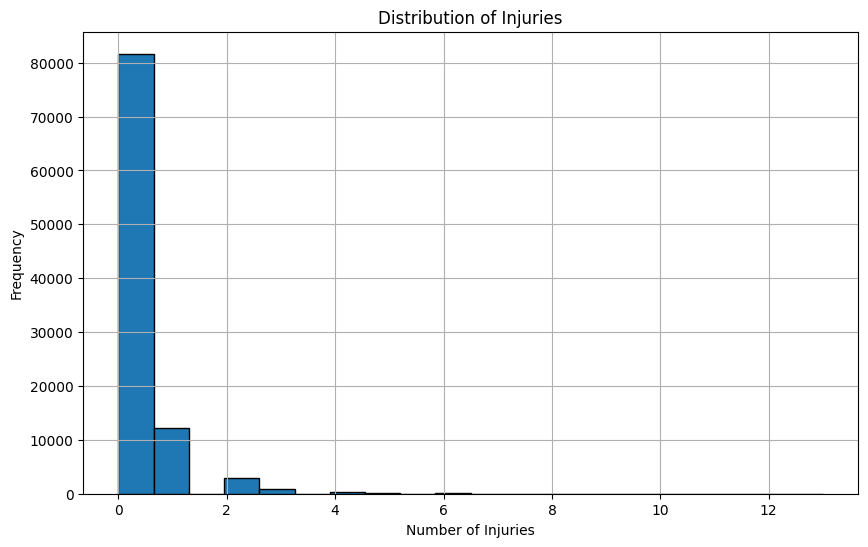

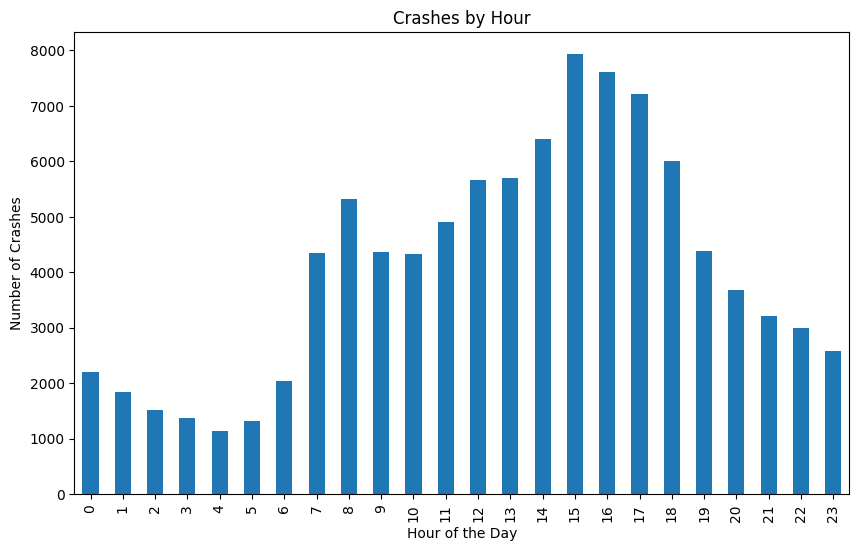

In [13]:
# Summary statistics for injuries
print(df["INJURIES_TOTAL"].describe())

# Distribution of injuries
plt.figure(figsize=(10, 6))
df["INJURIES_TOTAL"].hist(bins=20, edgecolor="black")
plt.title("Distribution of Injuries")
plt.xlabel("Number of Injuries")
plt.ylabel("Frequency")
plt.show()

# Crashes by hour
plt.figure(figsize=(10, 6))
df["CRASH_HOUR"].value_counts().sort_index().plot(kind="bar")
plt.title("Crashes by Hour")
plt.xlabel("Hour of the Day")
plt.ylabel("Number of Crashes")
plt.show()

## Heatmap Visualization

Using geographic coordinates (latitude and longitude), we create an interactive heatmap to visualize crash density across Chicago.

In [14]:
# Create a base map centered around Chicago
chicago_map = folium.Map(location=[41.8781, -87.6298], zoom_start=11)

# Prepare data for the heatmap
heatmap_data = df[["LATITUDE", "LONGITUDE", "INJURIES_TOTAL"]].values.tolist()

# Add heatmap to the map
HeatMap(heatmap_data, radius=10).add_to(chicago_map)

# Display the map
chicago_map